In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

node1 = "Low"
unblankedfile1 = "/datax/scratch/vlopez/summary_data/LOW_1336-4024_beam0000_unblanked"

node2 = "Mid"  # Adjust as needed
unblankedfile2 = "/datax/scratch/vlopez/summary_data/MID_4024-6376_beam0000_unblanked"

node3 = "High"  # Adjust as needed
unblankedfile3 = "/datax/scratch/vlopez/summary_data/HIGH_6376-9064_beam0000_unblanked"

print("**********************************")
print("Beginning quick node plotter for:", node1 + "/" + unblankedfile1) 
print("Beginning quick node plotter for:", node2 + "/" + unblankedfile2) 
print("Beginning quick node plotter for:", node3 + "/" + unblankedfile3) 
print("**********************************")

# LOW
unblanked_bliss_results1 = pd.read_csv(
    unblankedfile1 + ".dat",
    skiprows=3,
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

# MID
unblanked_bliss_results2 = pd.read_csv(
    unblankedfile2 + ".dat",
    skiprows=3,
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

# HIGH
unblanked_bliss_results3 = pd.read_csv(
    unblankedfile3 + ".dat",
    skiprows=3,
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

**********************************
Beginning quick node plotter for: Low//datax/scratch/vlopez/summary_data/LOW_1336-4024_beam0000_unblanked
Beginning quick node plotter for: Mid//datax/scratch/vlopez/summary_data/MID_4024-6376_beam0000_unblanked
Beginning quick node plotter for: High//datax/scratch/vlopez/summary_data/HIGH_6376-9064_beam0000_unblanked
**********************************


In [2]:
#LOW
blanking_rangeslow = [[1000, 1025],[1075, 1116],[1168, 1184.3],[1187, 1227],[1246, 1250],[1275, 1314],[1395, 1420.5],[1525, 1562],
                      [1572, 1580],[1671, 1705],[1775, 1802],[1811, 1813],[1899, 1901],[1927, 1945],[1951, 1980],[1990, 1996],
                      [1999, 2000.5],[2010, 2011],[2022, 2023],[2049, 2054],[2062.3, 2062.8],[2067.3, 2067.8],[2097, 2098],
                      [2110, 2154.6],[2166, 2169.5],[2179, 2203.5],[2211, 2212],[2226, 2227.5],[2237, 2241],[2244, 2248],[2257, 2258],
                      [2269, 2270.3],[2271.3, 2279],[2299, 2301],[2316, 2345],[2353, 2359.5],[2484, 2488],[2497.25, 2498.5],
                      [2565.75, 2585],[2590, 2609],[2705, 2800],[3264, 3274],[3341, 3343],[3492, 3493], [3600, 3702]]

#MID
blanking_rangesmid = [[3688, 4200],[4999, 5000.9],[5048, 5049.5],[5810, 5830]]

#HIGH
blanking_rangeshigh = [[4999, 5000.9],[5048, 5049.5],[5810, 5830],[7300, 7307],[7596.5, 7604]]


In [3]:
# FILTER FOR RFI blanking only
def filter_blankinglow(df, blanking_rangeslow):
    def inside_blankingl(freq):
        return any(start <= freq <= end for start, end in blanking_rangeslow)

    filter = df['Uncorrected_Frequency'].apply(lambda freq: not inside_blankingl(freq))
    return df[filter].reset_index(drop=True)

filtered_low = filter_blankinglow(unblanked_bliss_results1, blanking_rangeslow)

def filter_blankingmid(df, blanking_rangesmid):
    def inside_blankingm(freq):
        return any(start <= freq <= end for start, end in blanking_rangesmid)

    filter = df['Uncorrected_Frequency'].apply(lambda freq: not inside_blankingm(freq))
    return df[filter].reset_index(drop=True)

filtered_mid = filter_blankingmid(unblanked_bliss_results2, blanking_rangesmid)

# HIGH
HIGH_rfi_only = "/datax/scratch/vlopez/summary_data/HIGH_RFI-only"

rfi_only_results3 = pd.read_csv( 
    HIGH_rfi_only + ".dat", 
    skiprows=3, 
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3], 
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"] 
    )

filtered_high = rfi_only_results3
'''
def filter_blankinghigh(df, blanking_rangeshigh):
    def inside_blankingh(freq):
        return any(start <= freq <= end for start, end in blanking_rangeshigh)

    filter = df['Uncorrected_Frequency'].apply(lambda freq: not inside_blankingh(freq))
    return df[filter].reset_index(drop=True)

filtered_high = filter_blankinghigh(unblanked_bliss_results3, blanking_rangeshigh)
'''

print("LOW RAW", len(unblanked_bliss_results1))
print("LOW after RFI-blanking-only", len(filtered_low))
print("MID RAW", len(unblanked_bliss_results2))
print("MID after RFI-blanking-only", len(filtered_mid))
print("HIGH RAW", len(unblanked_bliss_results3))
print("HIGH after RFI-blanking-only", len(filtered_high))
print("TOTAL after RFI-blanking-only", len(filtered_low) + len(filtered_mid) + len(filtered_high))

LOW RAW 27965695
LOW after RFI-blanking-only 5159979
MID RAW 8746721
MID after RFI-blanking-only 141509
HIGH RAW 303410
HIGH after RFI-blanking-only 314451
TOTAL after RFI-blanking-only 5615939


In [4]:
# FILTER FOR DR AND RFI blanking

#LOW
LOW_rfi_dr = "/datax/scratch/vlopez/summary_data/LOW_DR-and-RFI-Blanking"

rfi_dr_low_results = pd.read_csv( 
    LOW_rfi_dr + ".dat", 
    skiprows=3, 
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3], 
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"] 
    )

final_results_low = rfi_dr_low_results

#MID
MID_rfi_dr = "/datax/scratch/vlopez/summary_data/MID_DR-and-RFI-Blanking"

rfi_dr_mid_results = pd.read_csv( 
    MID_rfi_dr + ".dat", 
    skiprows=3, 
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3], 
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"] 
    )

final_results_mid = rfi_dr_mid_results

#HIGH
HIGH_rfi_dr = "/datax/scratch/vlopez/summary_data/HIGH_DR-and-RFI-Blanking"

rfi_dr_high_results = pd.read_csv( 
    HIGH_rfi_dr + ".dat", 
    skiprows=3, 
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3], 
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"] 
    )

final_results_high = rfi_dr_high_results

'''
final_results_low = filtered_low[(filtered_low['Drift_Rate'] > 0.05) & (filtered_low['Drift_Rate'] < 1.5)]

final_results_mid = filtered_mid[(filtered_mid['Drift_Rate'] > 0.05) & (filtered_mid['Drift_Rate'] < 1.5)]

final_results_high = filtered_high[(filtered_low['Drift_Rate'] > 0.05) & (filtered_high['Drift_Rate'] < 1.5)]
'''
print("LOW after DR & RFI", len(final_results_low))
print("MID after DR and RFI", len(final_results_mid))
print("HIGH after DR & RFI", len(final_results_high))


LOW after DR & RFI 937326
MID after DR and RFI 32722
HIGH after DR & RFI 10858


In [5]:
print(final_results_low)

        Top_Hit_#  Drift_Rate        SNR  Uncorrected_Frequency
0              11    0.694753  15.661238             999.842431
1              13    0.088423  22.331272             999.978462
2              14    0.480011  15.100116             999.978469
3              20    0.966338  57.555008             999.941649
4              36    0.669489  19.864899             999.786908
...           ...         ...        ...                    ...
937321        896    0.347376  23.664291            3562.546292
937322       1114    1.446349  16.116060            3579.512961
937323       1116    1.433717  15.185410            3579.529605
937324       1385    0.410536  34.855103            3587.649017
937325       1393    1.357926  15.142757            3589.320436

[937326 rows x 4 columns]


In [20]:
bins = 48
MHz = ((9064-1000)/ bins)+1
print(MHz)

169.0


54.12080536912754


/tmp/ipykernel_757415/3173592698.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(0, 5000000)
/tmp/ipykernel_757415/3173592698.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(0, 5000000)
/tmp/ipykernel_757415/3173592698.py:36: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax3.set_ylim(0, 5000000)


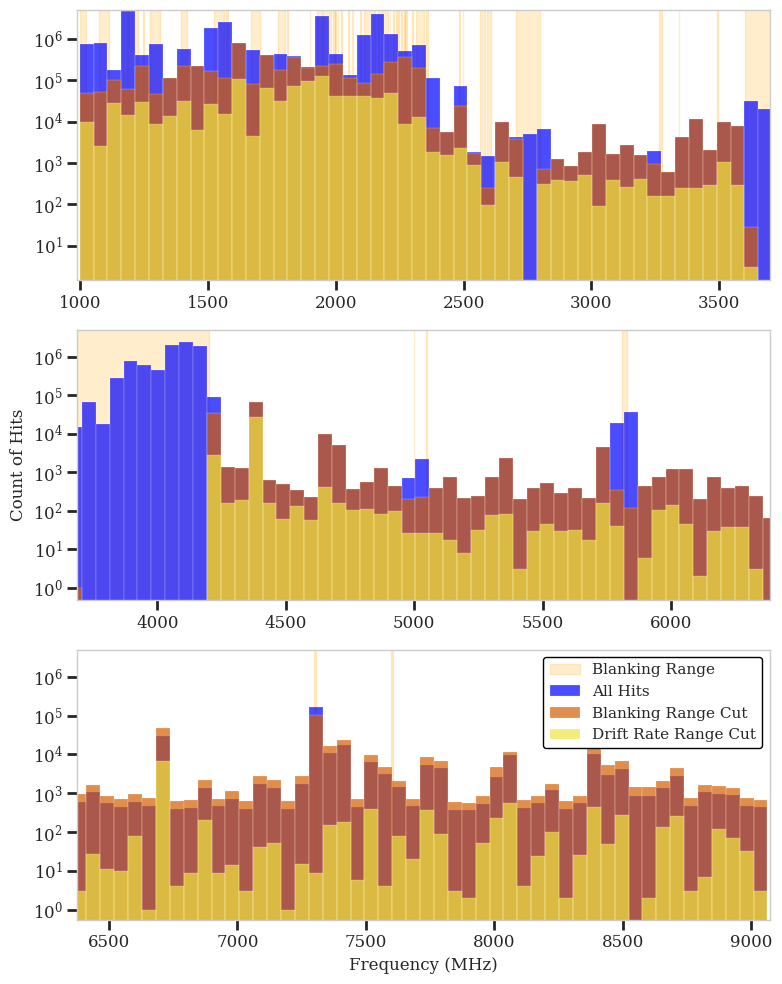

In [22]:
bin = np.linspace(1000, 9064, 150)
bin_width = bin[1] - bin[0]
print(bin_width)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

for i, (start, end) in enumerate(blanking_rangeslow):
    ax1.axvspan(start, end, color='orange', alpha=0.2, zorder=0, label='Blanking Range' if i == 0 else "")

for i, (start, end) in enumerate(blanking_rangesmid):
    ax2.axvspan(start, end, color='orange', alpha=0.2, zorder=0, label='Blanking Range' if i == 0 else "")

for i, (start, end) in enumerate(blanking_rangeshigh):
    ax3.axvspan(start, end, color='orange', alpha=0.2, zorder=0, label='Blanking Range' if i == 0 else "")


ax1.hist(unblanked_bliss_results1['Uncorrected_Frequency'],  bins=bin, color='blue', alpha=0.7, label="All Hits", edgecolor='white', linewidth=0.2, log=True)
ax1.hist(filtered_low['Uncorrected_Frequency'], bins=bin, color='#D55E00', alpha=0.7, label="Blanking Range Cut", edgecolor='white', linewidth=0.2, log=True)
ax1.hist(final_results_low['Uncorrected_Frequency'], bins=bin, color='#F0E442', alpha=0.7, label="Drift Rate Range Cut", edgecolor='white', linewidth=0.2, log=True)
ax1.set_xlim(990, 3698)
ax1.set_ylim(0, 5000000)
ax1.grid(False)

ax2.hist(unblanked_bliss_results2['Uncorrected_Frequency'], bins=bin, color='blue', alpha=0.7,label="All Hits", edgecolor='white', linewidth=0.2, log=True)
ax2.hist(filtered_mid['Uncorrected_Frequency'], bins=bin, color='#D55E00', alpha=0.7,label="Blanking Range Cut", edgecolor='white', linewidth=0.2, log=True)
ax2.hist(final_results_mid['Uncorrected_Frequency'], bins=bin, color='#F0E442', alpha=0.7,label="Drift Rate Range Cut", edgecolor='white', linewidth=0.2, log=True)
ax2.set_ylabel('Count of Hits')
ax2.set_xlim(3688, 6386)
ax2.set_ylim(0, 5000000)
ax2.grid(False)

ax3.hist(unblanked_bliss_results3['Uncorrected_Frequency'], bins=bin, color='blue', alpha=0.7,label="All Hits", edgecolor='white', linewidth=0.2, log=True)
ax3.hist(filtered_high['Uncorrected_Frequency'],bins=bin, color='#D55E00', alpha=0.7,label="Blanking Range Cut", edgecolor='white', linewidth=0.2, log=True)
ax3.hist(final_results_high['Uncorrected_Frequency'],bins=bin, color='#F0E442', alpha=0.7, label="Drift Rate Range Cut", edgecolor='white', linewidth=0.2, log=True)
ax3.set_xlim(6376, 9074)
ax3.set_ylim(0, 5000000)
ax3.set_xlabel('Frequency (MHz)')
ax3.grid(False)

#style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "legend.fontsize": 11,
    "xtick.major.width": 2,
    "ytick.major.width": 2,
    "xtick.major.size": 7,
    "ytick.major.size": 7,
})
plt.legend(loc='upper right', frameon=True, framealpha=1, edgecolor='black')
plt.tight_layout()

plt.show()